# This notebook is aimed at calculating all the biodiversity indices for the merged dataset. 

In [104]:
import numpy as np
import pandas as pd
import geopandas as gpd

In [105]:
# Set some directories. Here we use absolute directories. 
cwd = 'c:\\Users\\m1865\\Desktop\\Ticino'
cwd_Field = cwd + '\\FieldData'
cwd_Field_Data2 = cwd_Field + '\\Field Dataset 2'
cwd_Field_DataMerged = cwd_Field + '\\Field Dataset Merged'
cwd_Field_DataMerged_CSV = cwd_Field_DataMerged + "\\CSV"

In [106]:
df_Field = pd.read_csv(cwd_Field_DataMerged_CSV + "\\FieldDataMerged Valid with Species.csv")
df_Field

,Plot,Species,Quantity
0,FOR01,Prunus Padus,7
1,FOR01,Robinia Pseudoacacia,12
2,FOR01,Carpinus Betulus,13
3,FOR01,Quercus Robur,1
4,FOR01,Populus Canadensis,1
...,...,...,...
342,39,pisy,7
343,40,casa,2
344,40,pisy,2
345,40,prse,6


### Species Richness

In [119]:
df_Field_SpeciesRichness = df_Field[['Plot','Species']].copy()
df_Field_SpeciesRichness = df_Field_SpeciesRichness.groupby('Plot', as_index= False, sort= False).size()
df_Field_SpeciesRichness = df_Field_SpeciesRichness.rename(columns = {'size': 'Field Species Richness'})
df_Field_SpeciesRichness

,Plot,Field Species Richness
0,FOR01,5
1,FOR02,7
2,FOR03,4
3,FOR04,2
4,FOR05,1
...,...,...
91,35,3
92,37,2
93,38,4
94,39,2


# Preparation for Alpha Biodiversity Calculation (Calculate the total species count and add it as a column)

In [108]:
df_Field_Alpha = df_Field.copy()
df_Field_Count = df_Field_Alpha.groupby('Plot', as_index = False).sum('Quantity').rename(columns = {'Quantity': 'Total Count'})
df_Field_Alpha = pd.merge(df_Field_Alpha, df_Field_Count, on = 'Plot')
df_Field_Alpha

,Plot,Species,Quantity,Total Count
0,FOR01,Prunus Padus,7,34
1,FOR01,Robinia Pseudoacacia,12,34
2,FOR01,Carpinus Betulus,13,34
3,FOR01,Quercus Robur,1,34
4,FOR01,Populus Canadensis,1,34
...,...,...,...,...
342,39,pisy,7,19
343,40,casa,2,13
344,40,pisy,2,13
345,40,prse,6,13


# Shannon Index

In [109]:
df_Field_Shannon = df_Field_Alpha.copy()
df_Field_Shannon['pi'] = df_Field_Shannon['Quantity'] / df_Field_Shannon['Total Count']
df_Field_Shannon['-pilnpi'] = df_Field_Shannon['pi'] * np.log(df_Field_Shannon['pi']) * (-1)
df_Field_Shannon = df_Field_Shannon.groupby('Plot', as_index= False, sort = False).sum().drop(columns=["Species","Total Count","pi","Quantity"])
df_Field_Shannon = df_Field_Shannon.rename(columns={"-pilnpi": "Field Shannon"})
df_Field_Shannon

,Plot,Field Shannon
0,FOR01,1.267990
1,FOR02,1.604816
2,FOR03,0.534923
3,FOR04,0.474139
4,FOR05,0.000000
...,...,...
91,35,0.758937
92,37,0.562335
93,38,0.846145
94,39,0.658110


# Simpson Index

In [110]:
df_Field_Simpson = df_Field_Alpha.copy()
df_Field_Simpson['pi'] = df_Field_Simpson['Quantity'] / df_Field_Simpson['Total Count']
df_Field_Simpson['pi*pi'] = df_Field_Simpson['pi'] ** 2
df_Field_Simpson = df_Field_Simpson.groupby('Plot', as_index= False, sort = False).sum().drop(columns=["Species","Total Count","pi","Quantity"])
df_Field_Simpson['Field Simpson'] = 1 - df_Field_Simpson['pi*pi']
df_Field_Simpson = df_Field_Simpson.drop(columns=['pi*pi'])
df_Field_Simpson

,Plot,Field Simpson
0,FOR01,0.685121
1,FOR02,0.752500
2,FOR03,0.250000
3,FOR04,0.297521
4,FOR05,0.000000
...,...,...
91,35,0.438776
92,37,0.375000
93,38,0.448980
94,39,0.465374


# Beta - Bray-Curtis Dissimilarity! 
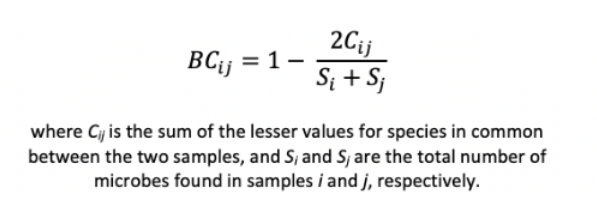

### Preparation: We need to substitute the abbreviations of the species to their full names. 

In [111]:
df_Name = pd.read_excel(cwd_Field_Data2 + "\\Lista specie forestali con abbreviazioni.xlsx")
df_Name.head()

,LISTA COMPLETA SPECIE FORESTALI DEL PARCO,Unnamed: 1,SPECIE TROVATE ALL'INTERNO DEI PLOT,ABBREVIAZIONI
0,Acer campestre,NaN,NaN,NaN
1,Acer platanoides,NaN,NaN,NaN
2,Acer pseudoplatanus,NaN,Acer pseudoplatanus,acps
3,Alnus glutinosa,NaN,NaN,NaN
4,Ailanthus altissima,NaN,NaN,NaN


In [112]:
df_Name_Clean = df_Name[['SPECIE TROVATE ALL\'INTERNO DEI PLOT','ABBREVIAZIONI']].dropna().reset_index(drop = True)
df_Name_Clean['SPECIE TROVATE ALL\'INTERNO DEI PLOT'] = df_Name_Clean['SPECIE TROVATE ALL\'INTERNO DEI PLOT'].apply(lambda x: x.title())
df_Name_Clean = df_Name_Clean.rename(columns = {'ABBREVIAZIONI': 'Species'})
df_Name_Clean

,SPECIE TROVATE ALL'INTERNO DEI PLOT,Species
0,Acer Pseudoplatanus,acps
1,Betula Pendula,bepe
2,Carpinus Betulus,cabe
3,Castanea Sativa,casa
4,Fraxinus Ornus,fror
5,Pinus Sylvestris,pisy
6,Pinus Rigida,piri
7,Prunus Padus,prpa
8,Prunus Serotina,prse
9,Quercus Cerris,quce


In [113]:
# Now we need to substitute the abbrevations to the full names
df_Beta_Prep = pd.merge(df_Field_Alpha, df_Name_Clean, on = 'Species', how = 'left')
df_Beta_Prep['SPECIE TROVATE ALL\'INTERNO DEI PLOT'] = df_Beta_Prep['SPECIE TROVATE ALL\'INTERNO DEI PLOT'].fillna(df_Beta_Prep[df_Beta_Prep['SPECIE TROVATE ALL\'INTERNO DEI PLOT'].isna()]['Species'])
df_Beta_Prep.drop(columns = ['Species'], inplace = True)
df_Beta_Prep.rename(columns = {'SPECIE TROVATE ALL\'INTERNO DEI PLOT': 'Species'}, inplace = True)
df_Beta_Prep = df_Beta_Prep[['Plot','Species','Quantity','Total Count']]
df_Beta_Prep

,Plot,Species,Quantity,Total Count
0,FOR01,Prunus Padus,7,34
1,FOR01,Robinia Pseudoacacia,12,34
2,FOR01,Carpinus Betulus,13,34
3,FOR01,Quercus Robur,1,34
4,FOR01,Populus Canadensis,1,34
...,...,...,...,...
342,39,Pinus Sylvestris,7,19
343,40,Castanea Sativa,2,13
344,40,Pinus Sylvestris,2,13
345,40,Prunus Serotina,6,13


### Calculation of Beta Biodiversity

In [114]:
# Initialize our beta matrix!
list_PlotName = df_Field_Shannon['Plot']
matrix_beta = np.zeros((df_Field_Shannon.shape[0],df_Field_Shannon.shape[0]))
list_PlotName = list(list_PlotName)
list_PlotName

['FOR01',
 'FOR02',
 'FOR03',
 'FOR04',
 'FOR05',
 'FOR06',
 'FOR07',
 'FOR08',
 'FOR09',
 'FOR10',
 'FOR11',
 'FOR12',
 'FOR13',
 'FOR14',
 'FOR15',
 'FOR16',
 'FOR17',
 'FOR18',
 'FOR19',
 'FOR20',
 'FOR21',
 'FOR22',
 'FOR23',
 'FOR24',
 'FOR25',
 'FOR26',
 'FOR27',
 'FOR28',
 'FOR29',
 'FOR30',
 'FOR31',
 'FOR51',
 'FOR52',
 'FOR53',
 'FOR54',
 'FOR55',
 'FOR56',
 'FOR57',
 'FOR58',
 'FOR59',
 'FOR60',
 'FOR61',
 'FOR62',
 'FOR63',
 'FOR64',
 'FOR65',
 'FOR66',
 'FOR67',
 'FOR68',
 'FOR69',
 'FOR70',
 'FOR71',
 'FOR72',
 'FOR73',
 'FOR74',
 'FOR75',
 'FOR76',
 'FOR77',
 'FOR78',
 'FOR79',
 'FOR80',
 'FOR81',
 'FOR82',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '21',
 '22',
 '23',
 '24',
 '25',
 '27',
 '28',
 '29',
 '30',
 '32',
 '33',
 '34',
 '35',
 '37',
 '38',
 '39',
 '40']

In [115]:
# Start to calculate the values for each pair of field plots! 
for i in list_PlotName:
    # Get the count of the no.i plot
    temp_Si = df_Beta_Prep.loc[df_Beta_Prep['Plot'] == i]['Total Count'].dropna().iloc[0]
    # print("Outer loop for plot " + str(i))
    for j in list_PlotName:
        # print("Inner loop for plot " + str(j))
        if list_PlotName.index(j) > list_PlotName.index(i):
            # Get the count of the no.j plot
            temp_Sj = df_Beta_Prep.loc[df_Beta_Prep['Plot'] == j]['Total Count'].iloc[0]
            # Now we need to find the common species among plot i and plot j! 
            temp_Species_i = set(df_Beta_Prep.loc[df_Beta_Prep['Plot'] == i]['Species'])
            temp_Species_j = set(df_Beta_Prep.loc[df_Beta_Prep['Plot'] == j]['Species'])
            temp_Common = temp_Species_i.intersection(temp_Species_j)
            # If there is no common species, then the numerator in the formula is equal to 0. Otherwise we need to calculate it! 
            temp_Cij = 0
            # If there is at least one common species, then we need to find the smaller value in plots i and j. 
            if temp_Common:
                for species in temp_Common:
                    temp_SpeciesCount_i = df_Beta_Prep.loc[(df_Beta_Prep['Plot'] == i) & (df_Beta_Prep['Species'] == species)]['Quantity'].iloc[0]
                    temp_SpeciesCount_j = df_Beta_Prep.loc[(df_Beta_Prep['Plot'] == j) & (df_Beta_Prep['Species'] == species)]['Quantity'].iloc[0]
                    temp_Cij = temp_Cij + min(temp_SpeciesCount_i, temp_SpeciesCount_j)
            temp_Beta = 1 - ((2 * temp_Cij) / (temp_Si + temp_Sj))
            matrix_beta[list_PlotName.index(i),list_PlotName.index(j)] = temp_Beta
            matrix_beta[list_PlotName.index(j),list_PlotName.index(i)] = temp_Beta
matrix_beta

array([[0.        , 0.91891892, 0.88571429, ..., 0.85454545, 1.        ,
        1.        ],
       [0.91891892, 0.        , 0.60526316, ..., 0.57377049, 1.        ,
        0.77358491],
       [0.88571429, 0.60526316, 0.        , ..., 0.36842105, 1.        ,
        0.75510204],
       ...,
       [0.85454545, 0.57377049, 0.36842105, ..., 0.        , 0.95      ,
        0.52941176],
       [1.        , 1.        , 1.        , ..., 0.95      , 0.        ,
        0.75      ],
       [1.        , 0.77358491, 0.75510204, ..., 0.52941176, 0.75      ,
        0.        ]])

In [116]:
df_Field_Beta = pd.DataFrame(
    matrix_beta,
    columns = list_PlotName,
    index = list_PlotName)
df_Field_Beta

,FOR01,FOR02,FOR03,FOR04,FOR05,FOR06,FOR07,FOR08,FOR09,FOR10,...,29,30,32,33,34,35,37,38,39,40
FOR01,0.000000,0.918919,0.885714,0.955556,0.953488,0.508772,0.888889,0.925926,0.680000,0.790698,...,0.708333,0.755102,0.714286,0.718750,0.606557,0.583333,1.000000,0.854545,1.000000,1.000000
FOR02,0.918919,0.000000,0.605263,0.803922,0.795918,0.777778,0.766667,0.678161,0.407407,0.434783,...,0.888889,0.745455,0.711111,0.628571,0.940299,0.814815,1.000000,0.573770,1.000000,0.773585
FOR03,0.885714,0.605263,0.000000,0.957447,0.955556,0.966102,0.892857,0.975904,0.740260,0.840909,...,0.840000,0.686275,0.511628,0.272727,0.904762,0.760000,1.000000,0.368421,1.000000,0.755102
FOR04,0.955556,0.803922,0.957447,0.000000,0.100000,0.705882,0.419355,0.965517,0.653846,0.714286,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
FOR05,0.953488,0.795918,0.955556,0.100000,0.000000,0.687500,0.379310,0.964286,0.640000,0.704918,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35,0.583333,0.814815,0.760000,1.000000,1.000000,1.000000,0.882353,1.000000,0.672727,0.909091,...,0.500000,0.310345,0.593750,0.454545,0.463415,0.000000,1.000000,0.600000,1.000000,0.777778
37,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.769231,1.000000,1.000000,1.000000,0.846154,1.000000,0.000000,1.000000,0.806452,0.840000
38,0.854545,0.573770,0.368421,1.000000,1.000000,1.000000,0.902439,1.000000,0.677419,0.835616,...,0.657143,0.444444,0.464789,0.254902,0.791667,0.600000,1.000000,0.000000,0.950000,0.529412
39,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.636364,1.000000,1.000000,1.000000,0.478261,1.000000,0.806452,0.950000,0.000000,0.750000


### Save these to local storage for later use! 

In [120]:
cwd_Field_DataMerged_CSV_Indices = cwd_Field_DataMerged + "\\CSV Biodiversity Indices"
df_Field_SpeciesRichness.to_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid SpeciesRichness.csv", index = False)
df_Field_Shannon.to_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Shannon.csv", index = False)
df_Field_Simpson.to_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Simpson.csv", index = False)
df_Field_Beta.to_csv(cwd_Field_DataMerged_CSV_Indices + "\\FieldDataMerged Valid Beta.csv", index = True)